In [324]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

[1] "app-store-dataset"

# **Import**

In [325]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import & Structure**

In [326]:
data <- read.csv('/kaggle/input/app-store-dataset/AppleStore.csv')

In [327]:
str(data)

'data.frame':	7197 obs. of  16 variables:
 $ id              : int  284882215 389801252 529479190 420009108 284035177 429047995 282935706 553834731 324684580 343200656 ...
 $ track_name      : chr  "Facebook" "Instagram" "Clash of Clans" "Temple Run" ...
 $ size_bytes      : num  3.90e+08 1.14e+08 1.16e+08 6.59e+07 1.30e+08 ...
 $ currency        : chr  "USD" "USD" "USD" "USD" ...
 $ price           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ rating_count_tot: int  2974676 2161558 2130805 1724546 1126879 1061624 985920 961794 878563 824451 ...
 $ rating_count_ver: int  212 1289 579 3842 3594 1814 5320 2453 8253 107 ...
 $ user_rating     : num  3.5 4.5 4.5 4.5 4 4.5 4.5 4.5 4.5 4.5 ...
 $ user_rating_ver : num  3.5 4 4.5 4 4.5 4 5 4.5 4.5 3 ...
 $ ver             : chr  "95" "10.23" "9.24.12" "1.6.2" ...
 $ cont_rating     : chr  "4+" "12+" "9+" "9+" ...
 $ prime_genre     : chr  "Social Networking" "Photo & Video" "Games" "Games" ...
 $ sup_devices.num : int  37 37 38 40 37 37 37 43 37 38 ...
 

In [328]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,7197,8.631310e+08,2.712368e+08,978148241,8.898921e+08,2.030334e+08,281656475,1.188376e+09,9.067193e+08,-7.193068e-01,-0.9700675,3.197222e+06
track_name*,2,7197,3.598277e+03,2.077067e+03,3598,3.598346e+03,2.667197e+03,1,7.195000e+03,7.194000e+03,-1.929212e-04,-1.2004332,2.448357e+01
size_bytes,3,7197,1.991345e+08,3.592069e+08,97153024,1.182084e+08,8.803029e+07,589824,4.025970e+09,4.025380e+09,4.921928e+00,31.9118426,4.234176e+06
currency*,4,7197,1.000000e+00,0.000000e+00,1,1.000000e+00,0.000000e+00,1,1.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00
price,5,7197,1.726218e+00,5.833006e+00,0,9.841604e-01,0.000000e+00,0,2.999900e+02,2.999900e+02,3.140202e+01,1425.6379893,6.875696e-02
rating_count_tot,6,7197,1.289291e+04,7.573941e+04,300,1.829562e+03,4.447800e+02,0,2.974676e+06,2.974676e+06,1.958703e+01,566.7929019,8.927835e+02
rating_count_ver,7,7197,4.603739e+02,3.920455e+03,23,7.837333e+01,3.409980e+01,0,1.770500e+05,1.770500e+05,2.641402e+01,891.8025294,4.621264e+01
user_rating,8,7197,3.526956e+00,1.517948e+00,4,3.803091e+00,7.413000e-01,0,5.000000e+00,5.000000e+00,-1.524784e+00,0.9806434,1.789291e-02
user_rating_ver,9,7197,3.253578e+00,1.809363e+00,4,3.441743e+00,7.413000e-01,0,5.000000e+00,5.000000e+00,-9.840221e-01,-0.6574528,2.132799e-02


In [329]:
summary(data)

       id             track_name          size_bytes          currency        
 Min.   :2.817e+08   Length:7197        Min.   :5.898e+05   Length:7197       
 1st Qu.:6.001e+08   Class :character   1st Qu.:4.692e+07   Class :character  
 Median :9.781e+08   Mode  :character   Median :9.715e+07   Mode  :character  
 Mean   :8.631e+08                      Mean   :1.991e+08                     
 3rd Qu.:1.082e+09                      3rd Qu.:1.819e+08                     
 Max.   :1.188e+09                      Max.   :4.026e+09                     
     price         rating_count_tot  rating_count_ver    user_rating   
 Min.   :  0.000   Min.   :      0   Min.   :     0.0   Min.   :0.000  
 1st Qu.:  0.000   1st Qu.:     28   1st Qu.:     1.0   1st Qu.:3.500  
 Median :  0.000   Median :    300   Median :    23.0   Median :4.000  
 Mean   :  1.726   Mean   :  12893   Mean   :   460.4   Mean   :3.527  
 3rd Qu.:  1.990   3rd Qu.:   2793   3rd Qu.:   140.0   3rd Qu.:4.500  
 Max.   :299.99

**Check missing value**

In [330]:
colSums(is.na(data))

id       track_name       size_bytes         currency 
               0                0                0                0 
           price rating_count_tot rating_count_ver      user_rating 
               0                0                0                0 
 user_rating_ver              ver      cont_rating      prime_genre 
               0                0                0                0 
 sup_devices.num  ipadSc_urls.num         lang.num          vpp_lic 
               0                0                0                0

**duplicate check**

In [331]:
sum(duplicated(data))

[1] 0

# **2. Data Transform**

In [332]:
names(data) <- c('id','name','size','currency','price','total_rating','version_rating','user_rating','version_user_rating',
                  'version','cont_rating','genre','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic')

**Data Check**

In [333]:
head(data)

,id,name,size,currency,price,total_rating,version_rating,user_rating,version_user_rating,version,cont_rating,genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,284882215,Facebook,389879808,USD,0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
2,389801252,Instagram,113954816,USD,0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
3,529479190,Clash of Clans,116476928,USD,0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
4,420009108,Temple Run,65921024,USD,0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
5,284035177,Pandora - Music & Radio,130242560,USD,0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
6,429047995,Pinterest,74778624,USD,0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1


# **3. Data Visualization**

In [334]:
data2 <- data[,-1]

**Rating Histogram**

In [335]:
p1 <- ggplot(data2) + geom_histogram(aes(x=total_rating), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('total_rating Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p2 <- ggplot(data2) + geom_histogram(aes(x=version_rating), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('version_rating Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p3 <- ggplot(data2) + geom_histogram(aes(x=user_rating), bins = 30, col = 'white') +
            theme_bw() + ggtitle('user_rating Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p4 <- ggplot(data2) + geom_histogram(aes(x=version_user_rating), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('version_user_rating Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

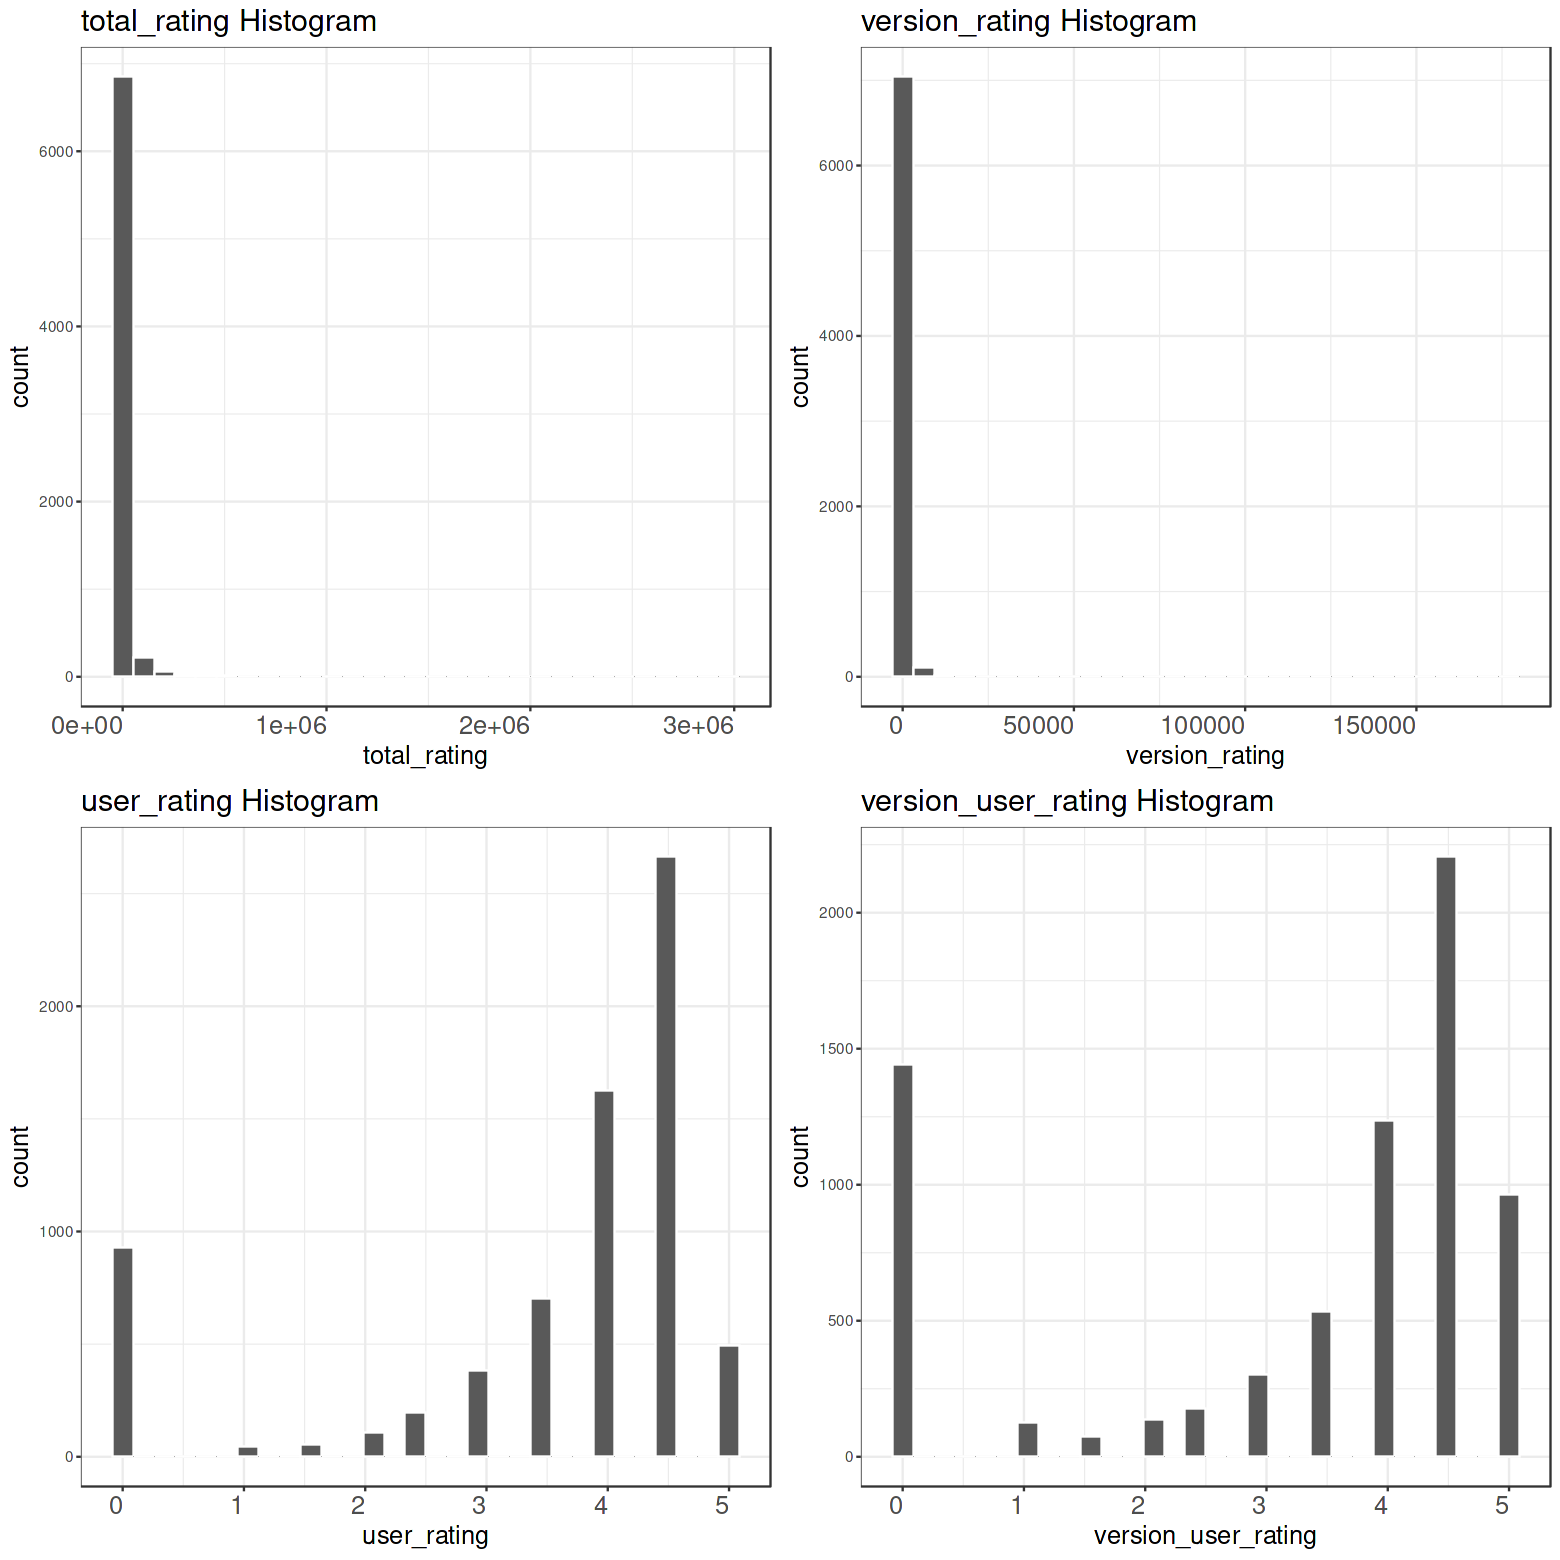

In [336]:
grid.arrange(p1,p2,p3,p4 ,ncol = 2)

------

**numeric columns histogram**

In [337]:
p1 <- ggplot(data2) + geom_histogram(aes(x=sup_devices_num), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('sup_devices_num Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p2 <- ggplot(data2) + geom_histogram(aes(x=ipadSc_urls_num), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('ipadSc_urls_num Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p3 <- ggplot(data2) + geom_histogram(aes(x=lang_num), bins = 30, col = 'white') +
            theme_bw() + ggtitle('lang_num Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p4 <- ggplot(data2) + geom_histogram(aes(x=vpp_lic), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('vpp_lic Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

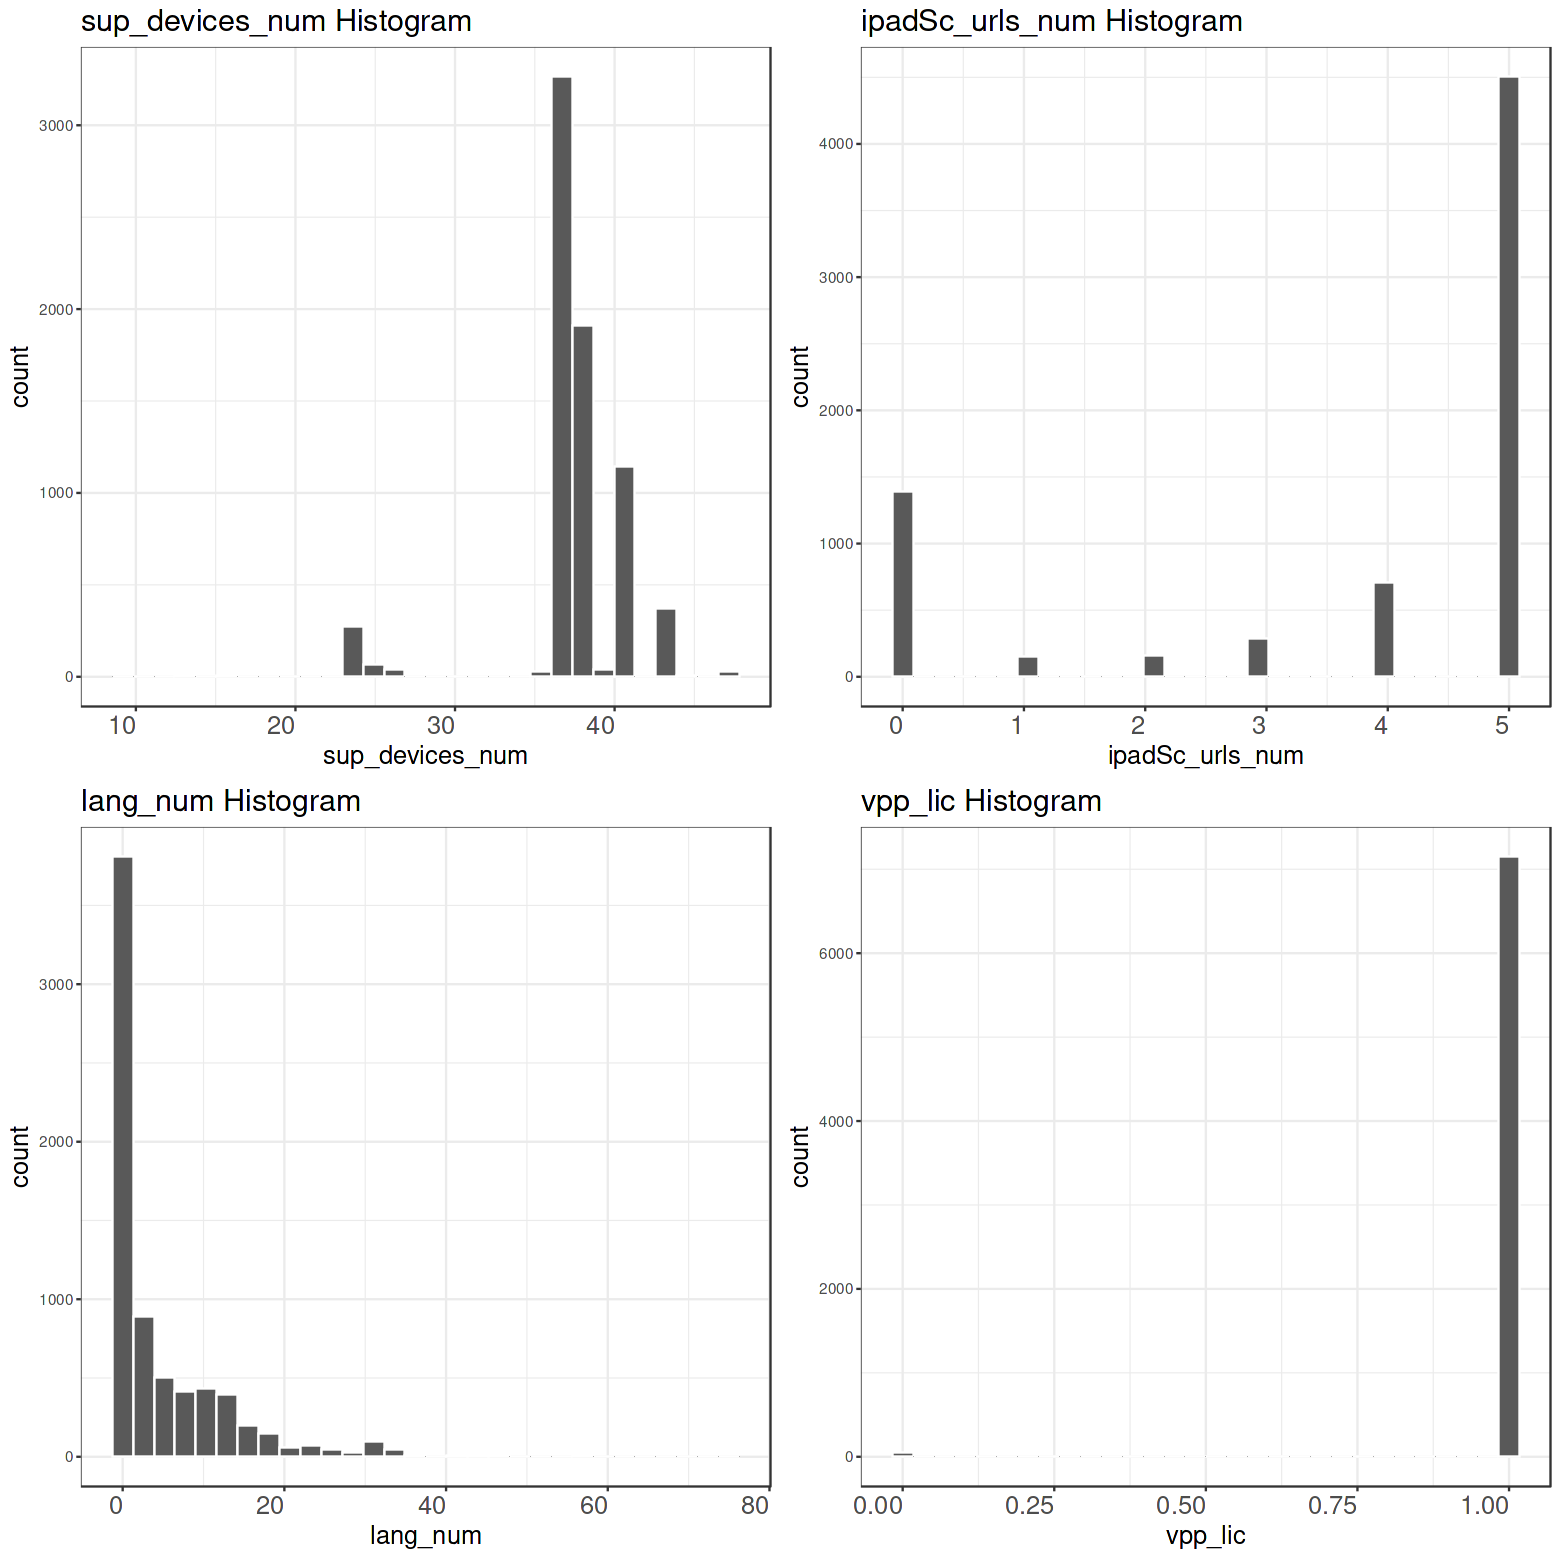

In [338]:
grid.arrange(p1,p2,p3,p4 ,ncol = 2)

----------

**Counting plot**

In [339]:
p1 <- ggplot(data2) + geom_bar(aes(x=genre, fill = genre))+
            theme_bw() + ggtitle('genre Count') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )
                              
p2 <- ggplot(data2) + geom_bar(aes(x=cont_rating, fill = cont_rating)) + 
            theme_bw() + ggtitle('cont_rating Count ') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )


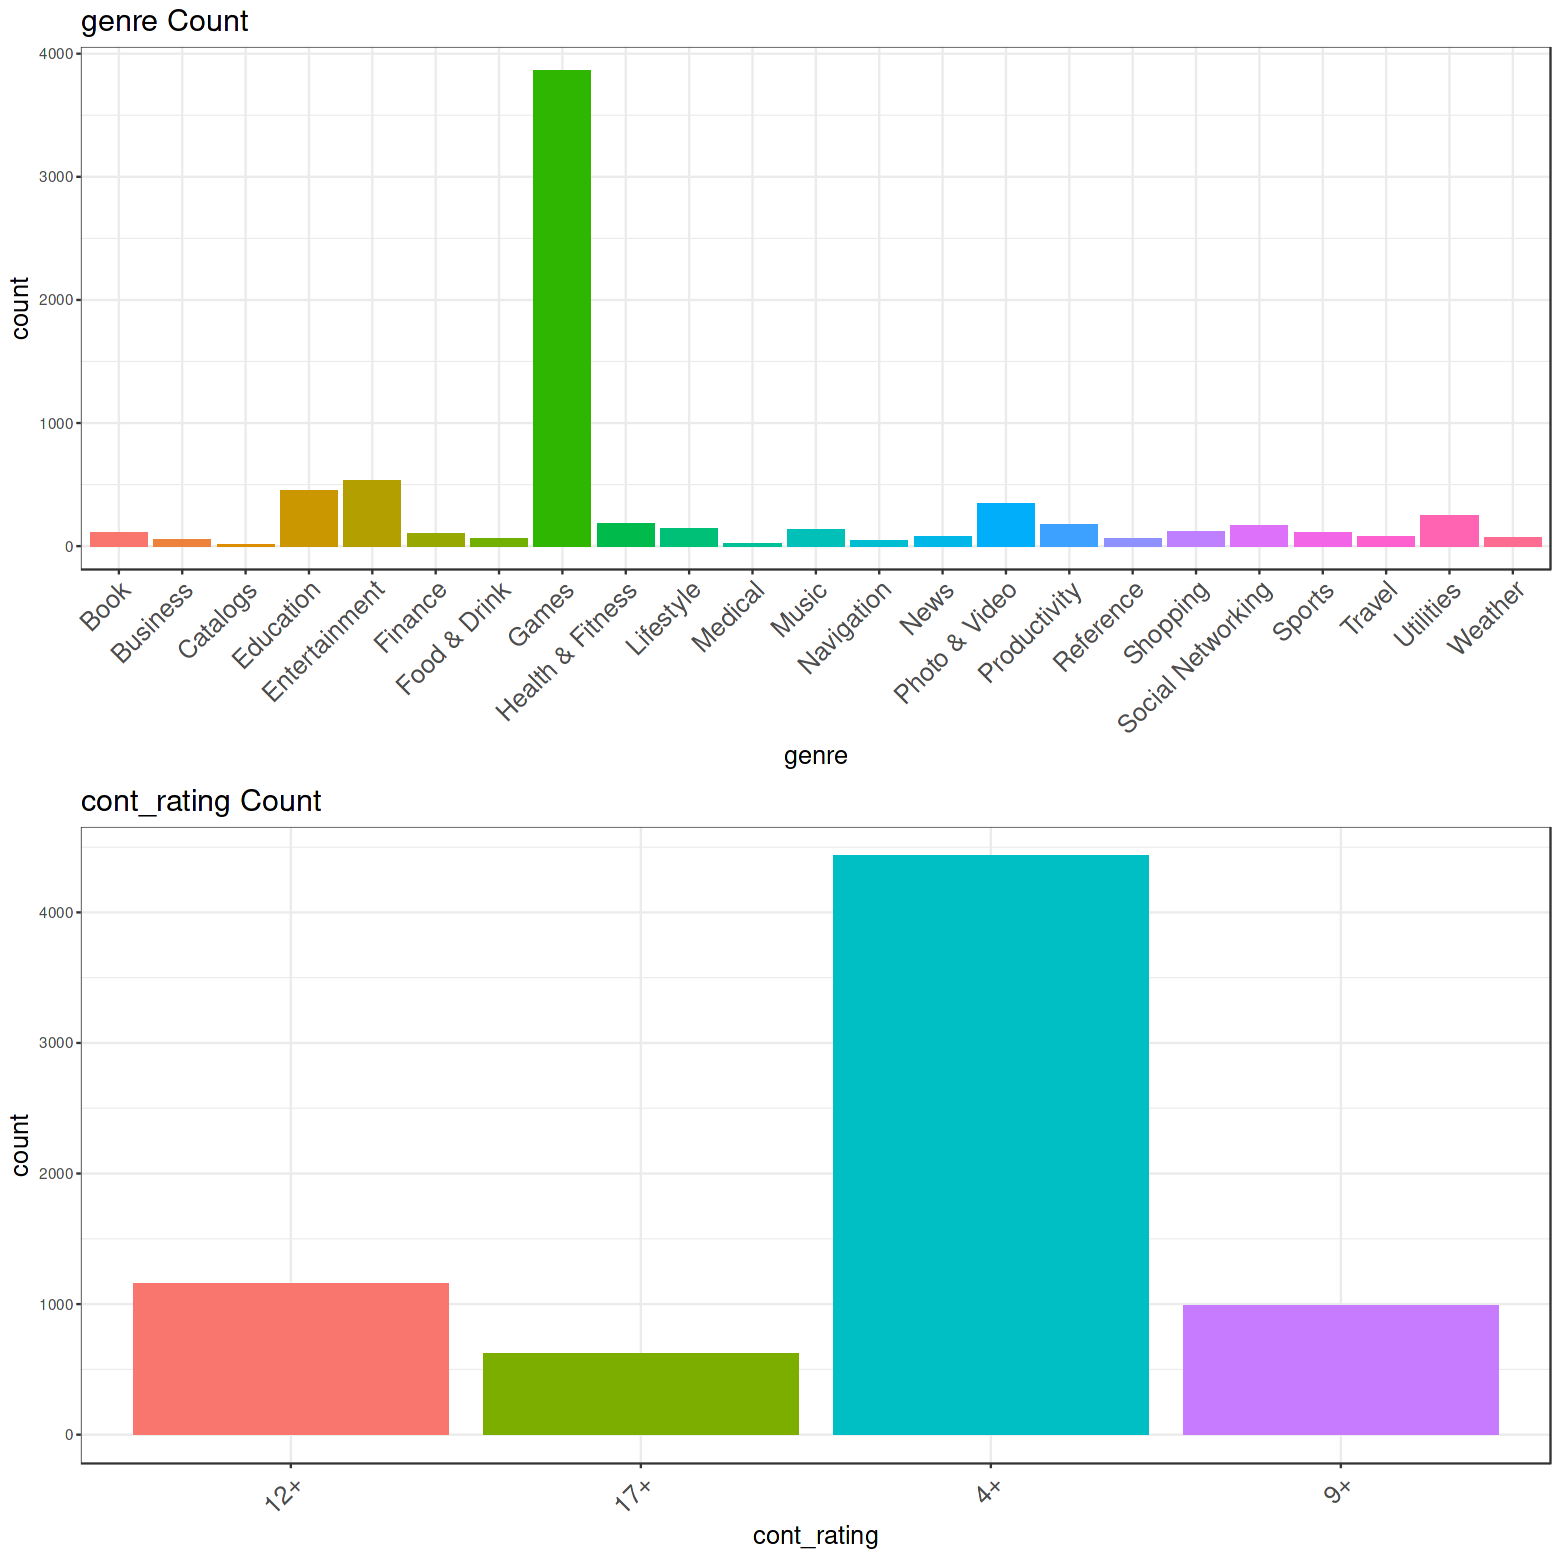

In [340]:
grid.arrange(p1,p2 ,ncol = 1)

---------

**Top 10 genre with the highest average rating**

In [341]:
top10_genre_avgrating <- data2 %>% 
                group_by(genre) %>% 
                summarize(Avg_rating = mean(user_rating,na.rm=T)) %>%
                arrange(desc(Avg_rating))

top10_genre_avgrating <- top10_genre_avgrating[1:10,]

In [342]:
top10_genre_avgrating

genre,Avg_rating
<chr>,<dbl>
Productivity,4.005618
Music,3.978261
Photo & Video,3.800860
Business,3.745614
Health & Fitness,3.700000
Games,3.685008
Weather,3.597222
Shopping,3.540984
Reference,3.453125


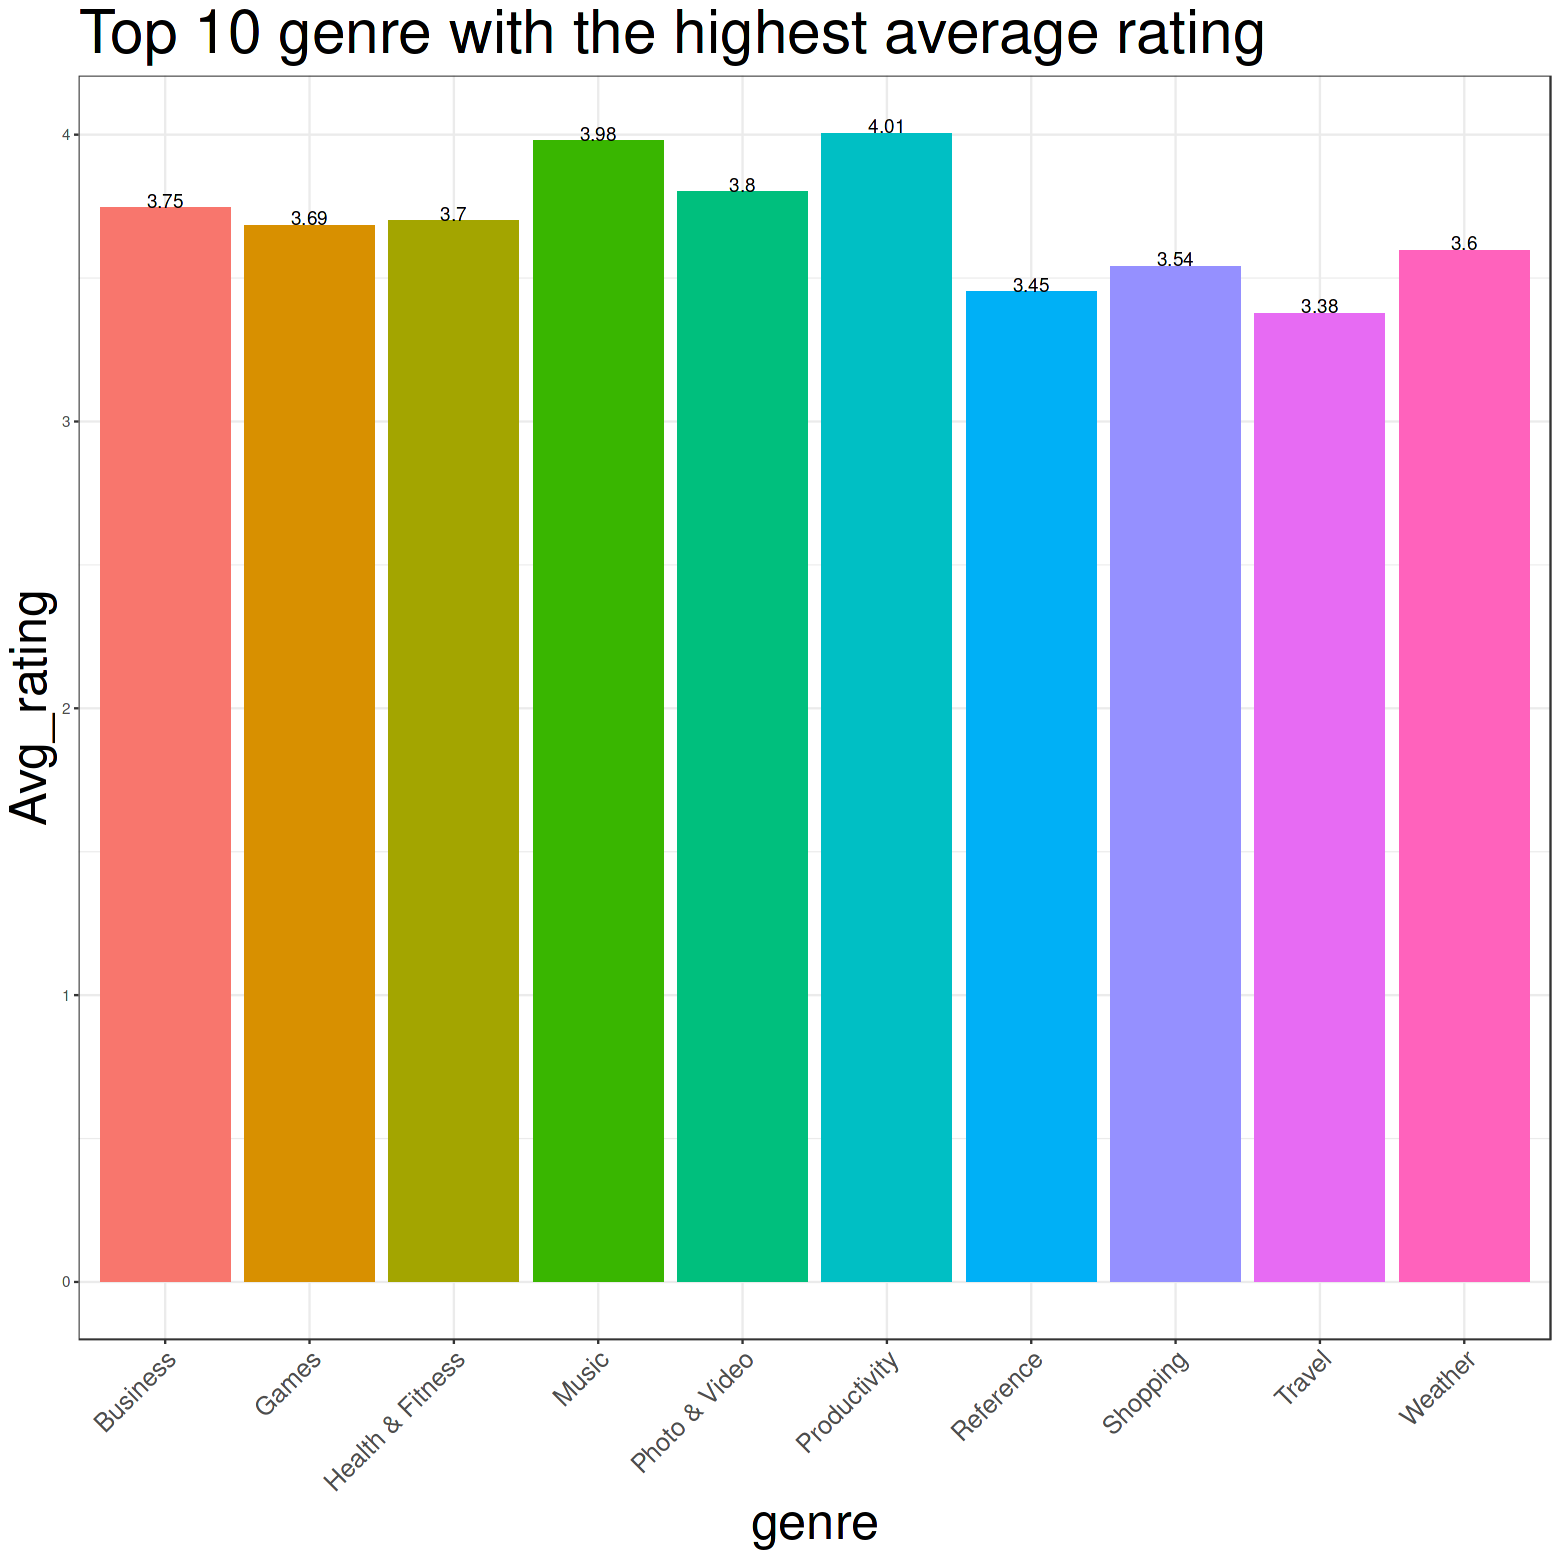

In [343]:
ggplot(top10_genre_avgrating) + geom_col(aes(x=genre, y= Avg_rating , fill = genre)) +
            geom_text(aes(x=genre , y= Avg_rating, label= round(Avg_rating,2)), vjust=0) +
            ggtitle('Top 10 genre with the highest average rating') + 
            theme_bw() +
            theme(legend.position = 'none',
            axis.title = element_text(size=30),
            axis.text.x = element_text(size = 15, angle = 45, hjust=1),
            title = element_text(size=30)
            )

---------------

**Free app vs paid app**

In [344]:
price<- data2

price$price <- ifelse(price$price >0 , 'paid', 'free')

In [345]:
price_rate <- price %>% 
                group_by(price) %>%
                count(price)

In [346]:
price_rate

price,n
<chr>,<int>
free,4056
paid,3141


In [347]:
pct <- paste(round(price_rate$n / sum(price_rate$n) * 100 ,1),'%')

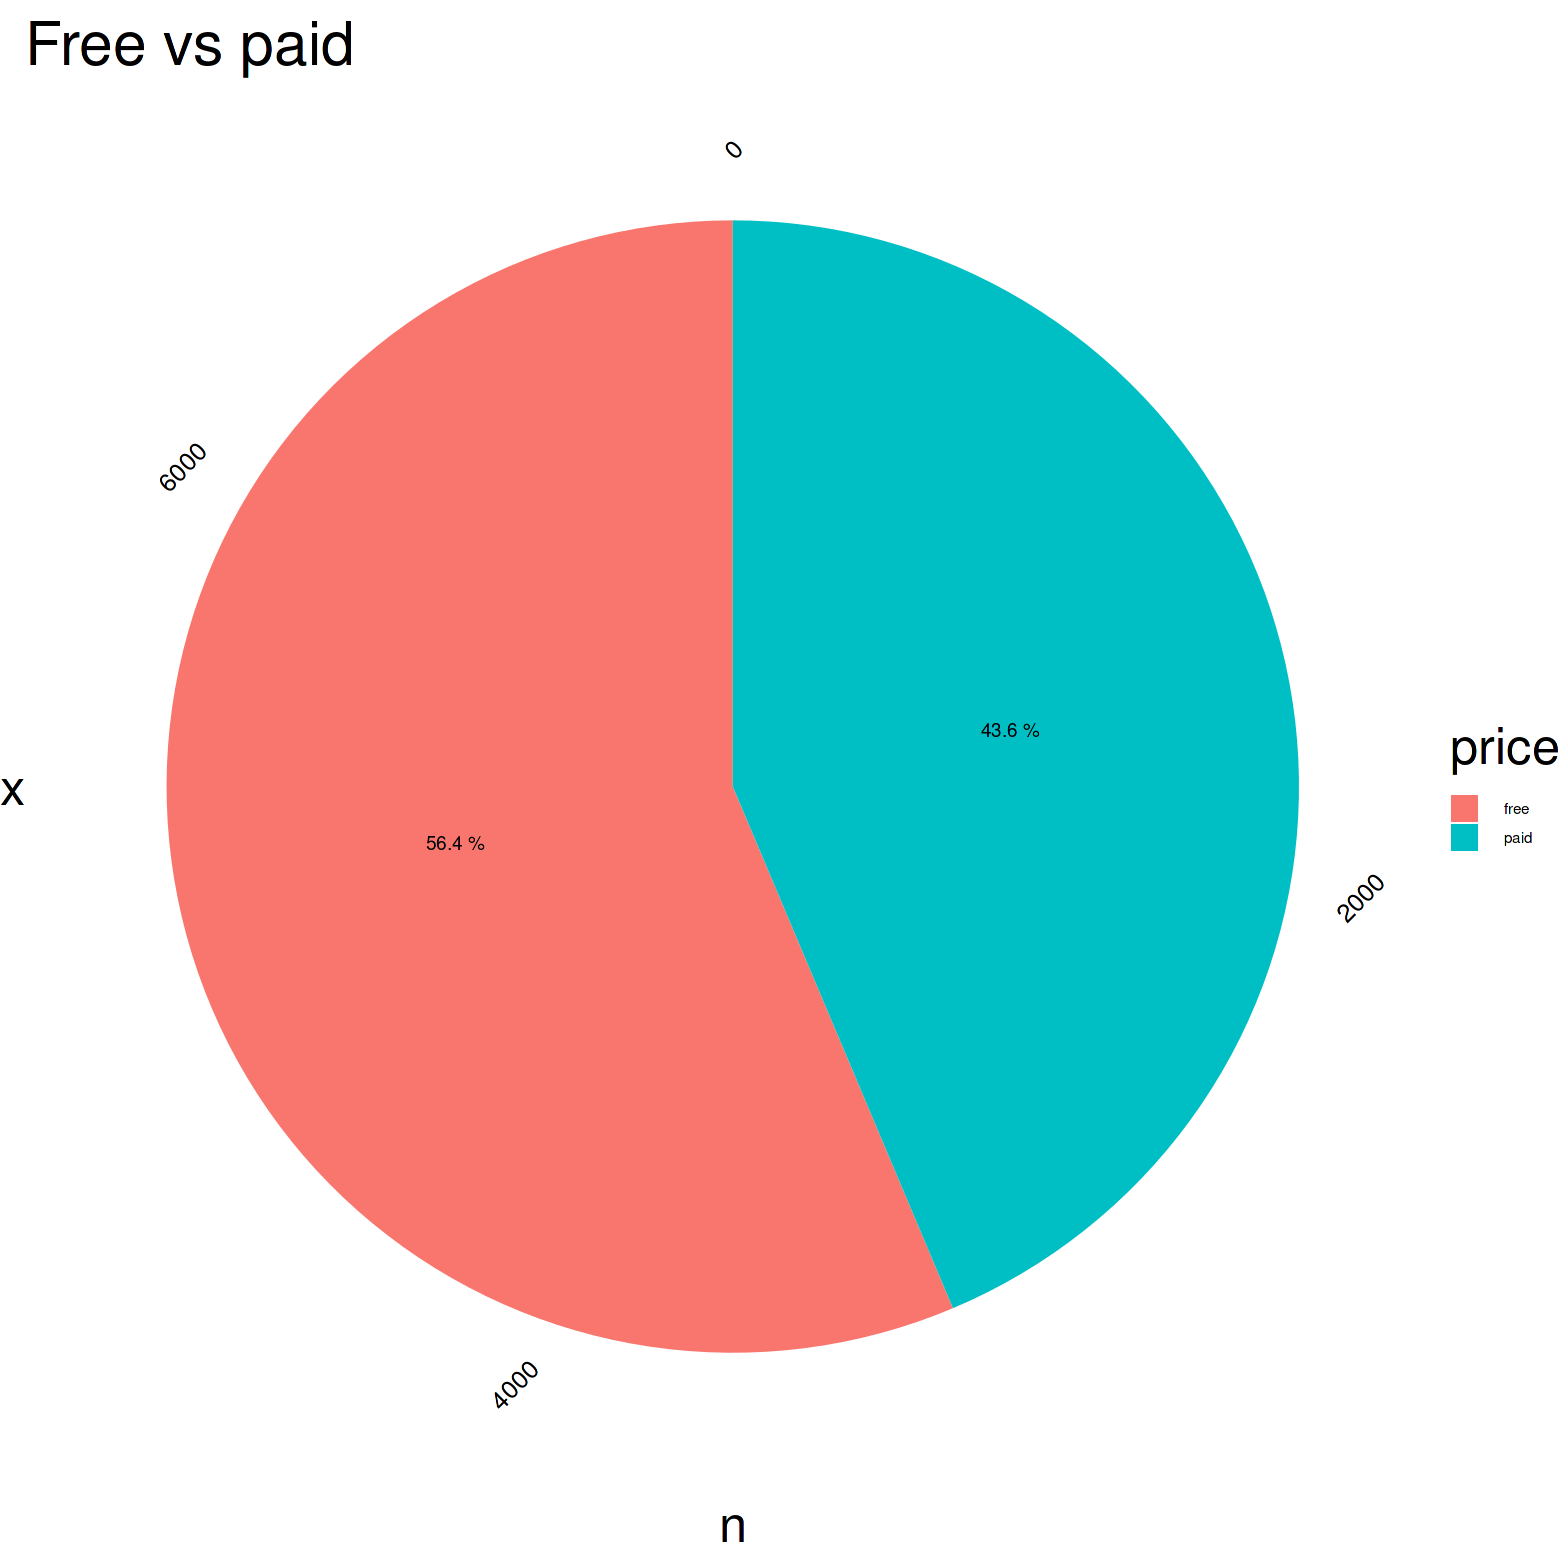

In [348]:
ggplot(price_rate, aes(x= 1 , y= n , fill = price)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct), position = position_stack(vjust = 0.5)) +
        coord_polar('y', start = 0) +
        ggtitle('Free vs paid') +
        theme_void() +
        theme(
        axis.title = element_text(size=30),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

----------

**Number of paid apps by genre**

In [349]:
genre_price <- price %>% 
                group_by(genre,price) %>%
                count(price)

In [350]:
head(genre_price)

genre,price,n
<chr>,<chr>,<int>
Book,free,66
Book,paid,46
Business,free,20
Business,paid,37
Catalogs,free,9
Catalogs,paid,1


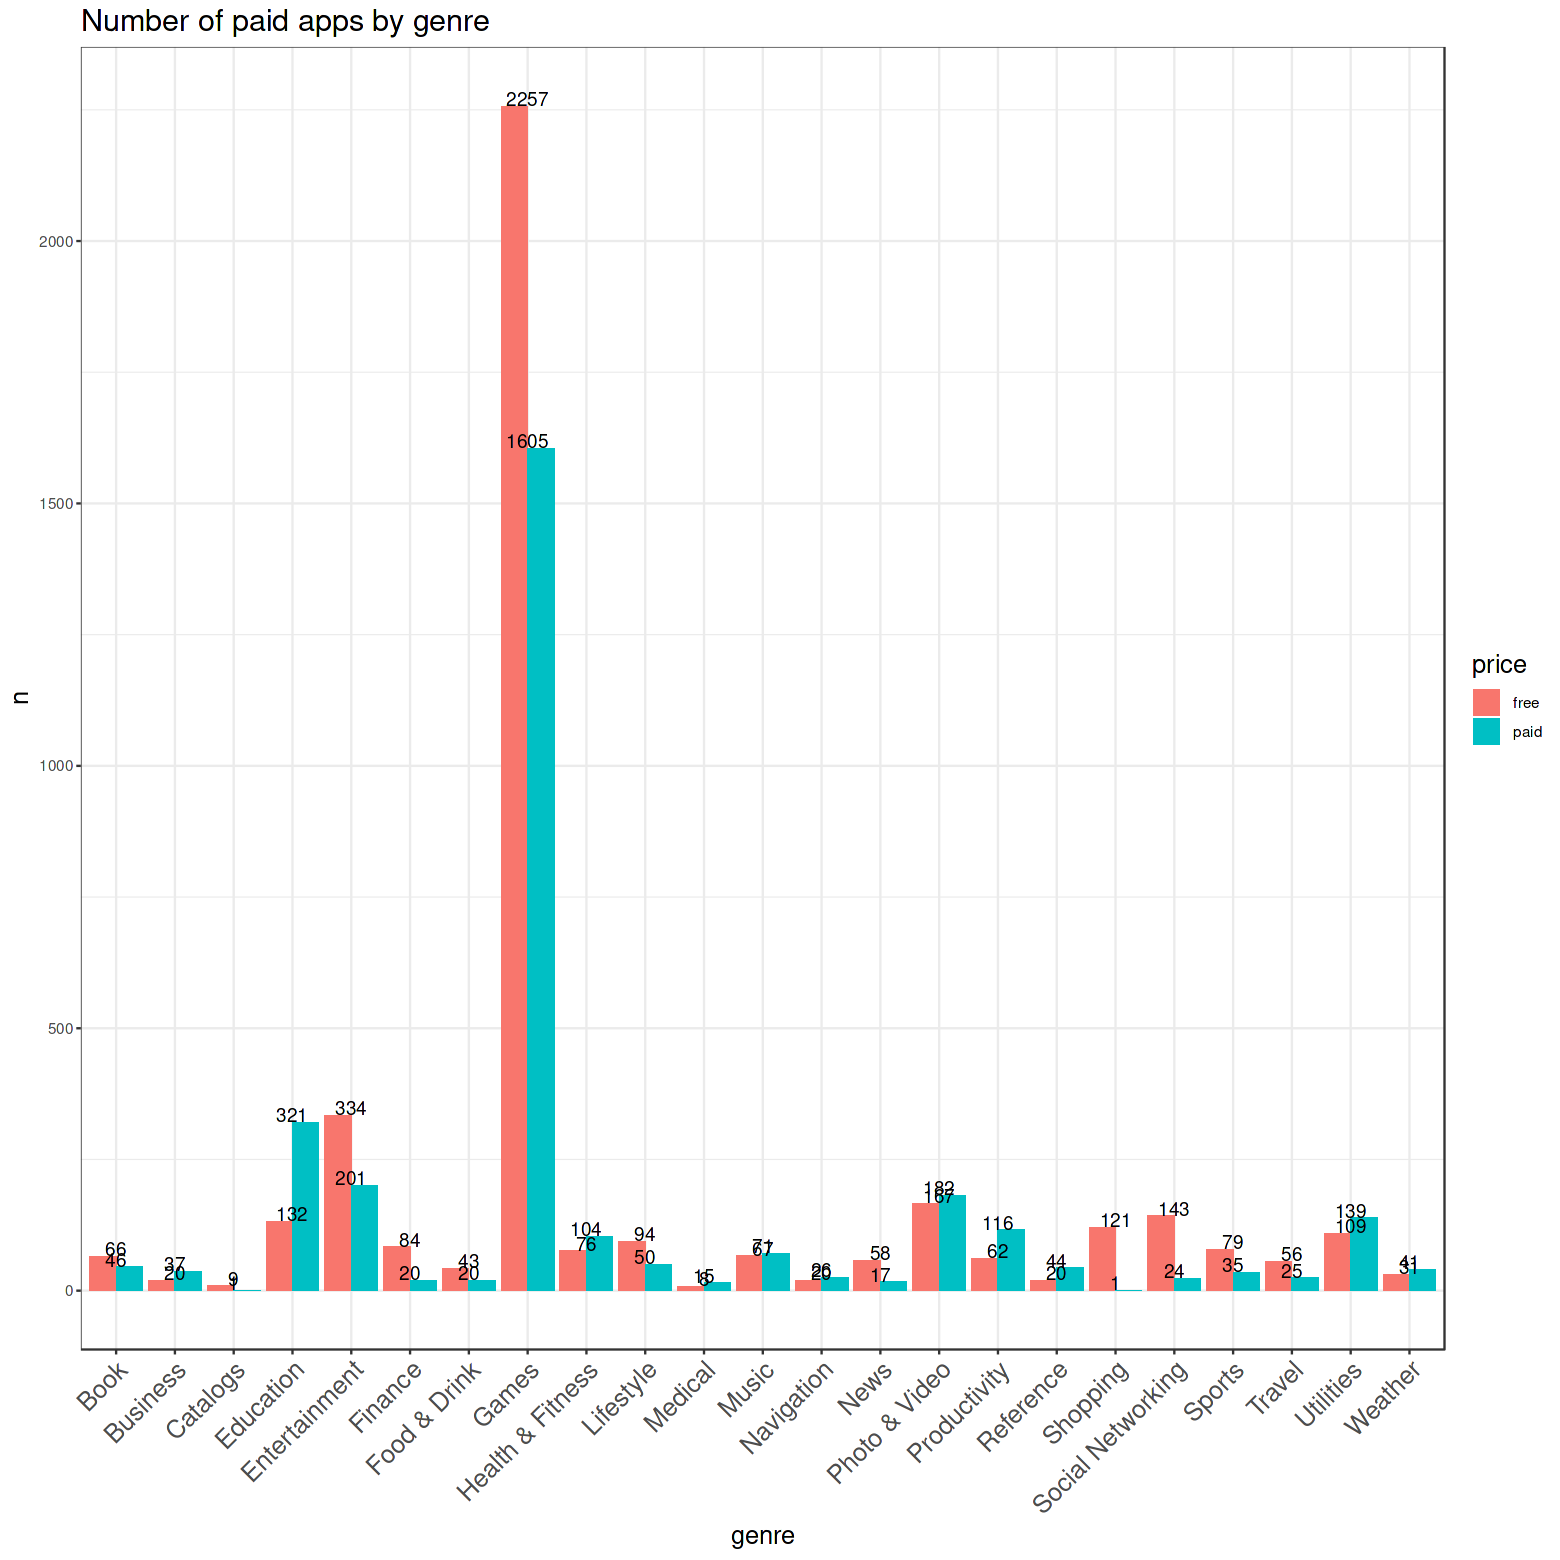

In [351]:
ggplot(genre_price) + geom_col(aes(x= genre , y = n , fill = price), position = 'dodge')+
            geom_text(aes(x=genre , y= n, label= n), vjust=0) +
            ggtitle('Number of paid apps by genre') + 
            theme_bw() +
            theme(
            axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, angle = 45, hjust=1),
            title = element_text(size=15)
            )

---------

**Average ratings for paid and free apps**

In [352]:
price_avg_rating <- price %>% 
                group_by(price) %>%
                summarize(avg_rating = mean(user_rating, na.rm = T))

In [353]:
price_avg_rating

price,avg_rating
<chr>,<dbl>
free,3.376726
paid,3.720949


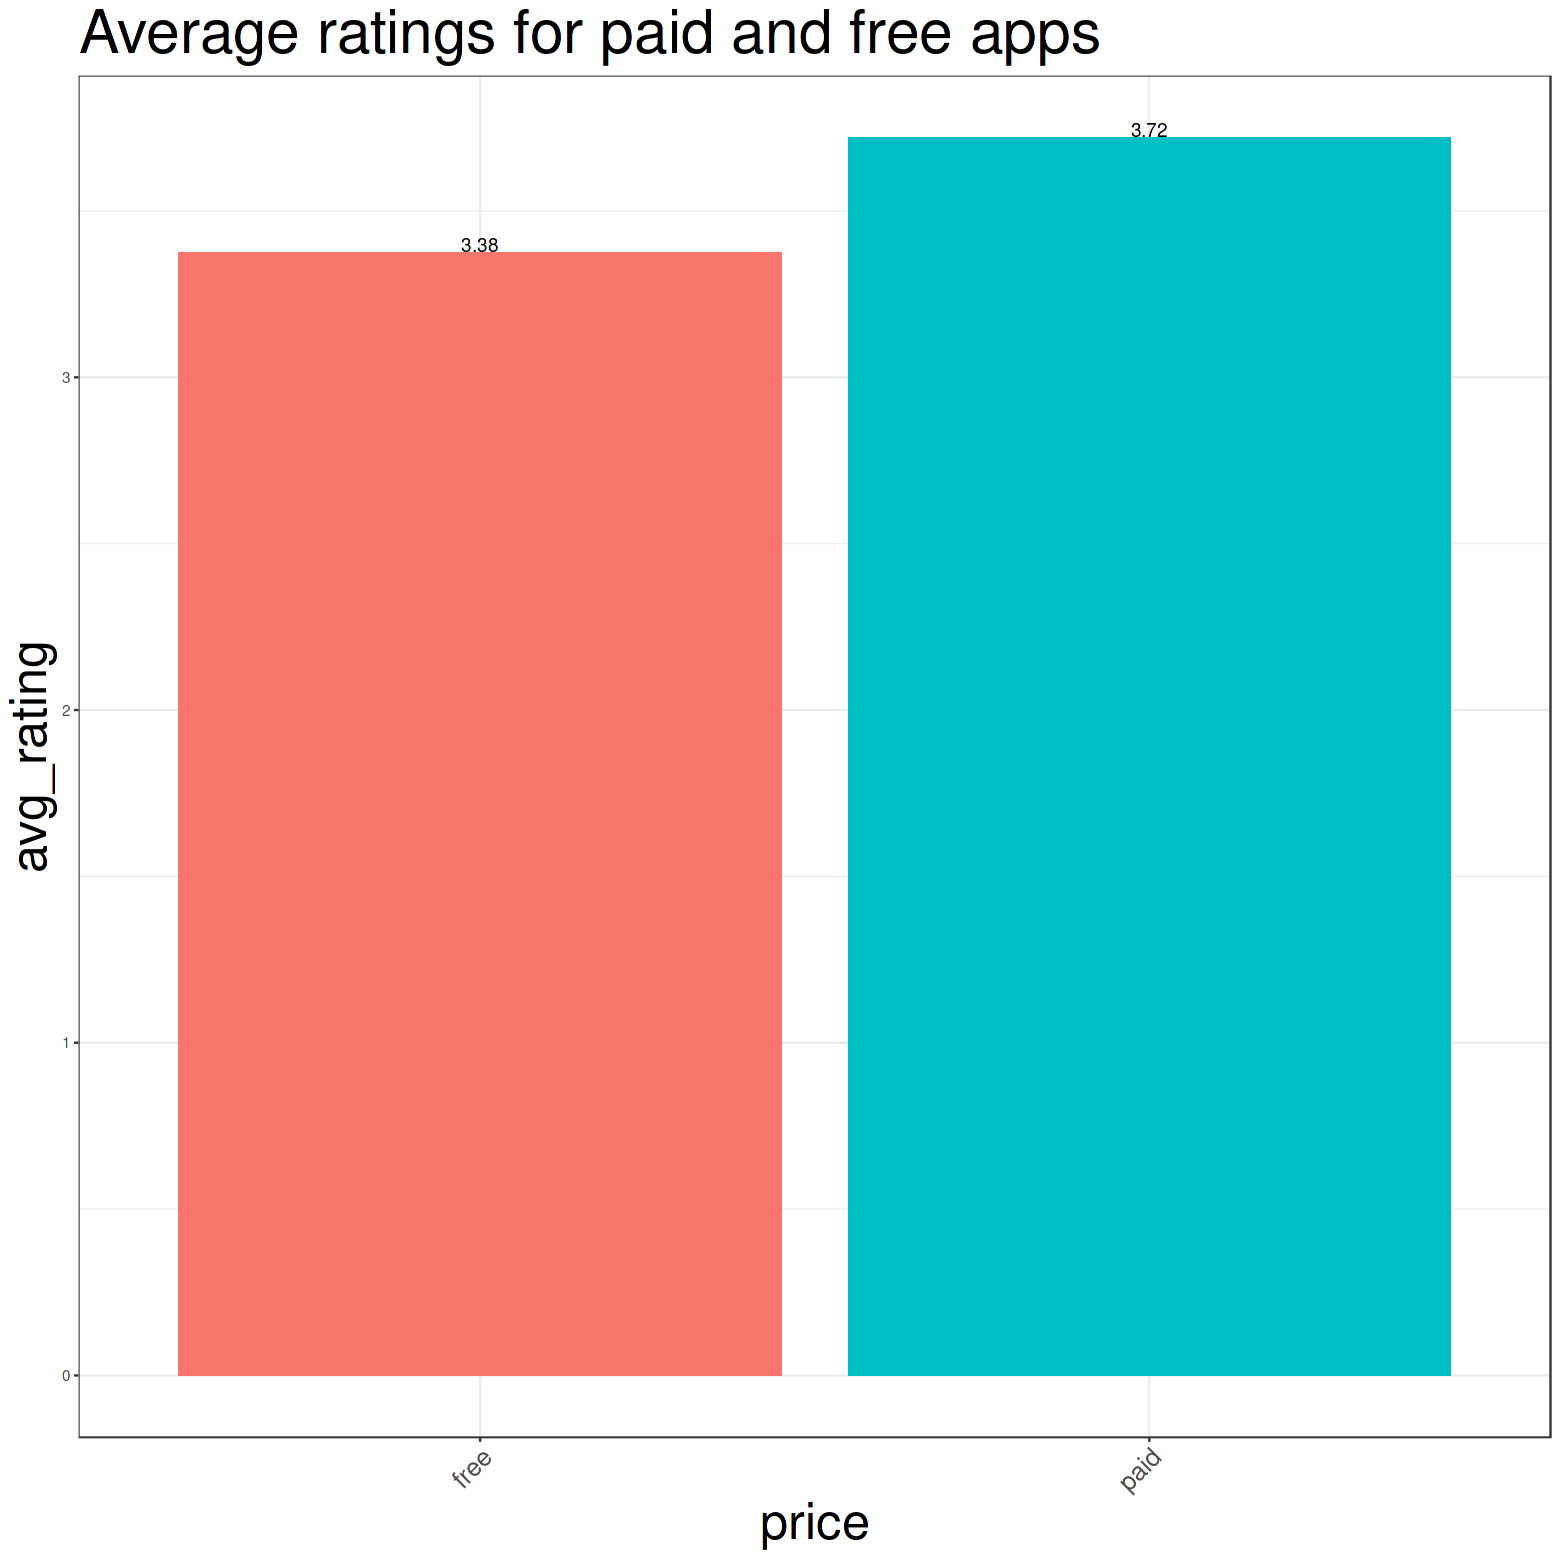

In [354]:
ggplot(price_avg_rating) + geom_col(aes(x=price, y= avg_rating , fill = price)) +
            geom_text(aes(x=price , y= avg_rating, label= round(avg_rating,2)), vjust=0) +
            ggtitle('Average ratings for paid and free apps') + 
            theme_bw() +
            theme(legend.position = 'none',
            axis.title = element_text(size=30),
            axis.text.x = element_text(size = 15, angle = 45, hjust=1),
            title = element_text(size=30)
            )

-----

**The most expensive app top5**

In [355]:
topprice5_app <- data2 %>%
            group_by(name) %>%
            arrange(desc(price))

topprice5_app <- topprice5_app[1:5,]

In [356]:
topprice5_app

name,size,currency,price,total_rating,version_rating,user_rating,version_user_rating,version,cont_rating,genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
<chr>,<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
LAMP Words For Life,583263232,USD,299.99,41,0,4.0,0.0,1.5.5,4+,Education,24,5,1,1
Proloquo2Go - Symbol-based AAC,723764224,USD,249.99,773,10,4.0,3.5,5.0.1,4+,Education,37,5,3,1
KNFB Reader,106429440,USD,99.99,71,0,4.5,0.0,2.7.3,4+,Productivity,37,5,14,1
NAVIGON Europe,144412672,USD,74.99,927,3,3.5,2.5,2.17,4+,Navigation,37,2,21,1
Articulation Station Pro,425919488,USD,59.99,294,130,4.5,5.0,2.2.3,4+,Education,38,5,1,1


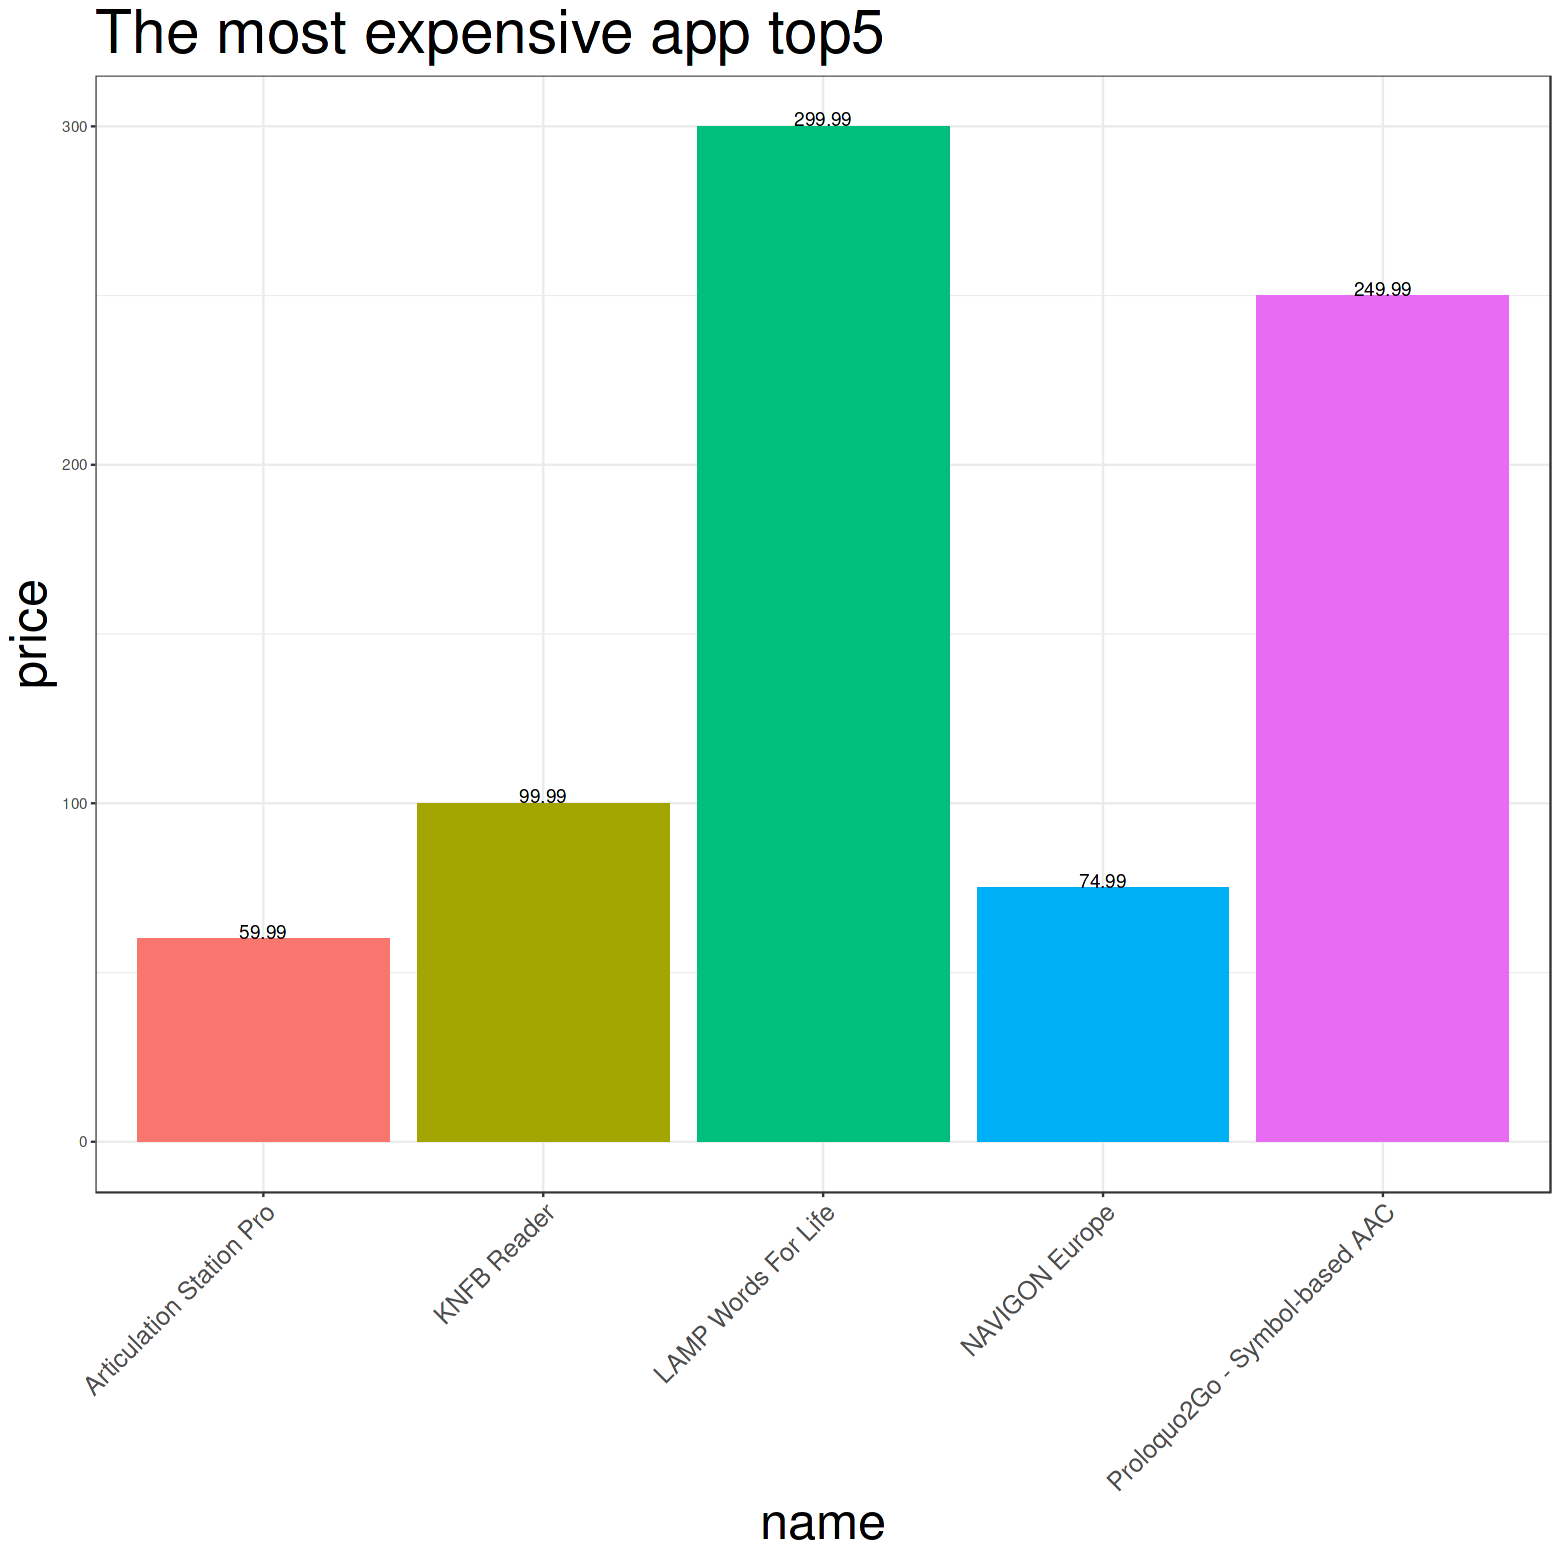

In [357]:
ggplot(topprice5_app) + geom_col(aes(x=name, y= price , fill = name)) +
            geom_text(aes(x=name , y= price, label= price), vjust=0) +
            ggtitle('The most expensive app top5') + 
            theme_bw() +
            theme(legend.position = 'none',
            axis.title = element_text(size=30),
            axis.text.x = element_text(size = 15, angle = 45, hjust=1),
            title = element_text(size=30)
            )

--------

**Correlation**

In [358]:
num_cols <- c('size','price','total_rating','version_rating','user_rating',
              'version_user_rating','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic')

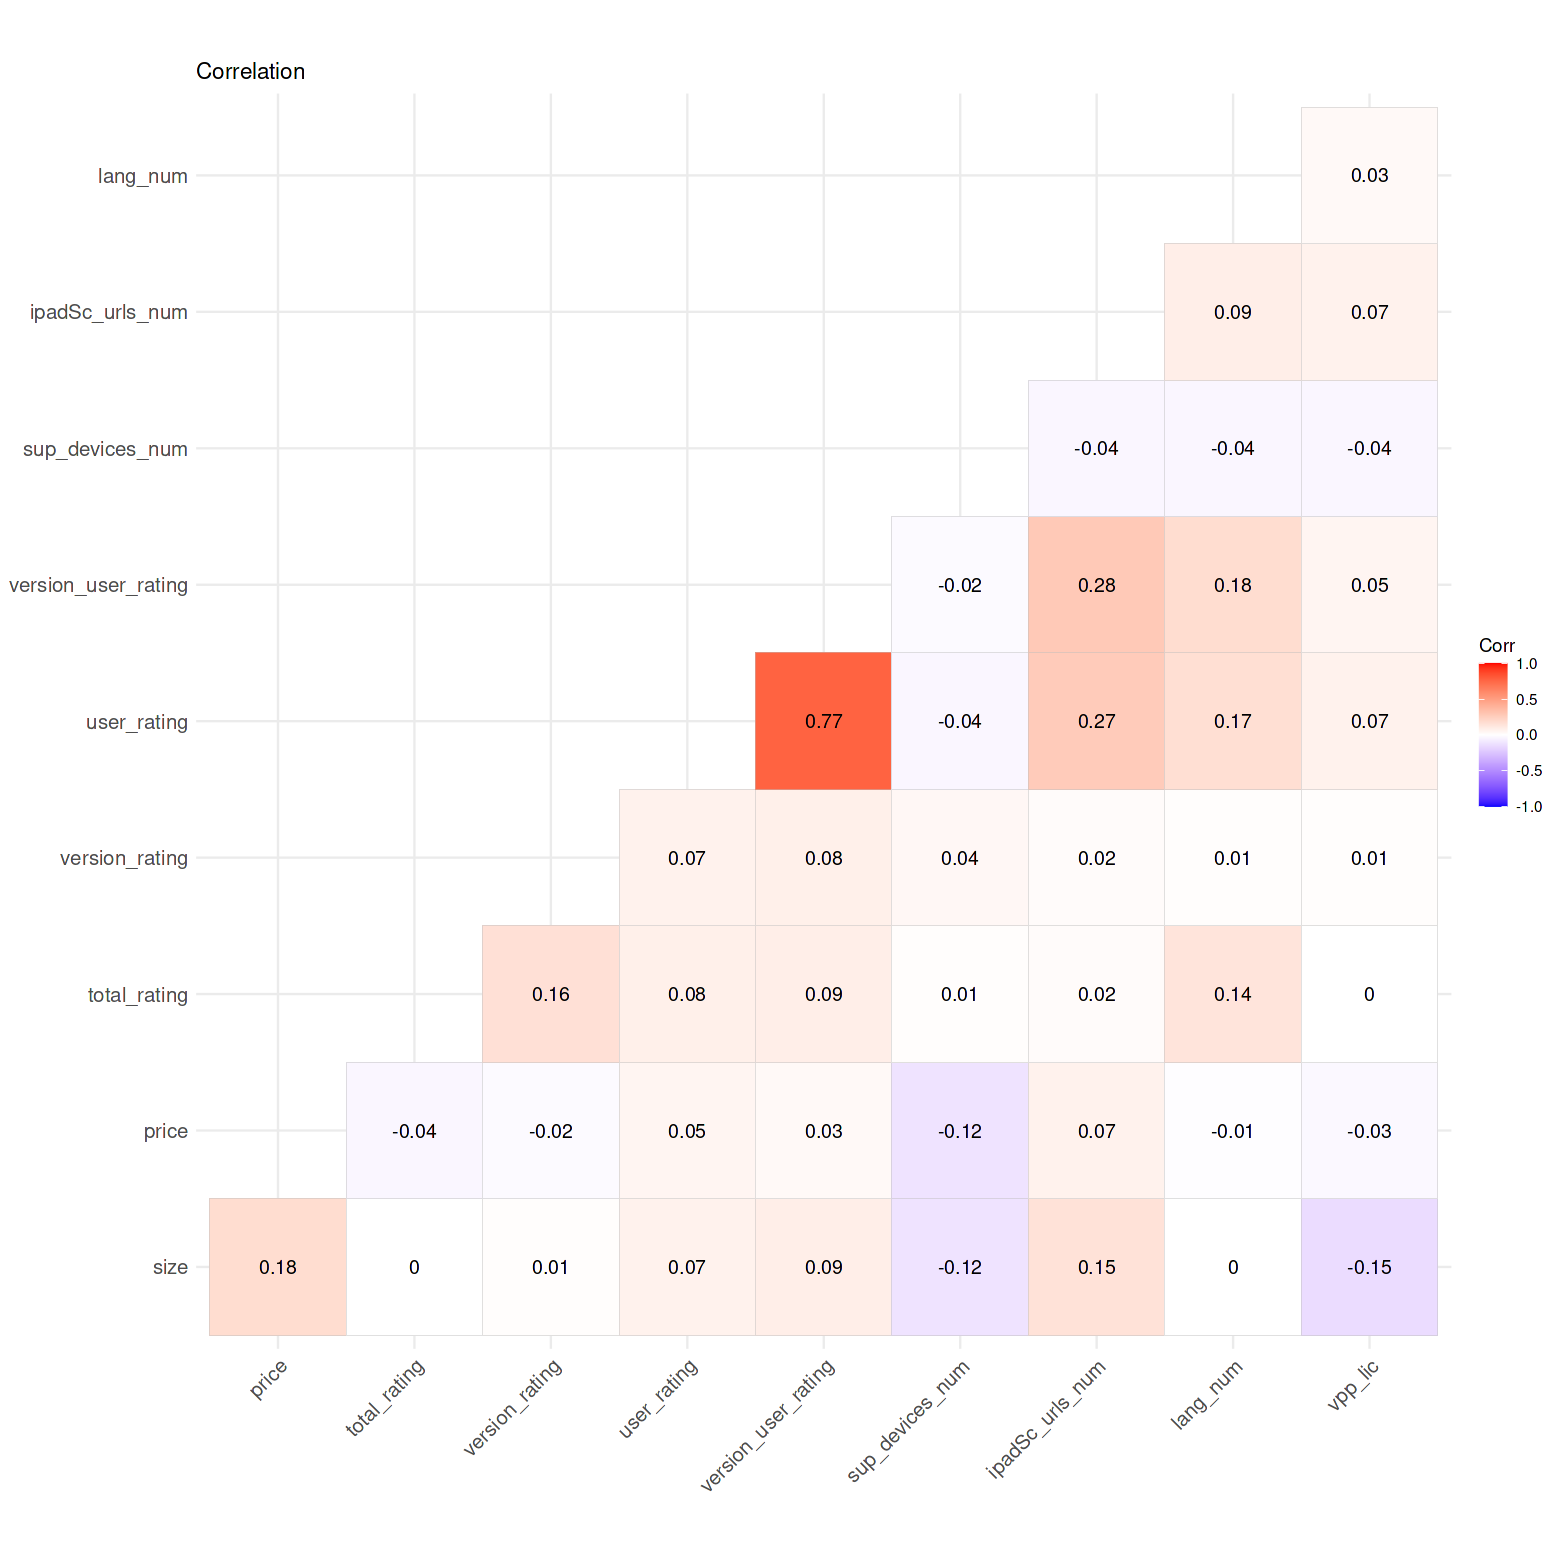

In [359]:
ggcorrplot(cor(data[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

----

# **4. Modeling**

In [360]:
library(randomForest)
library(Metrics)
library(caret)
library(mltools)
library(data.table)

In [361]:
data <- data[,-c(1:2,4,10)]

In [362]:
head(data)

,size,price,total_rating,version_rating,user_rating,version_user_rating,cont_rating,genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,389879808,0,2974676,212,3.5,3.5,4+,Social Networking,37,1,29,1
2,113954816,0,2161558,1289,4.5,4.0,12+,Photo & Video,37,0,29,1
3,116476928,0,2130805,579,4.5,4.5,9+,Games,38,5,18,1
4,65921024,0,1724546,3842,4.5,4.0,9+,Games,40,5,1,1
5,130242560,0,1126879,3594,4.0,4.5,12+,Music,37,4,1,1
6,74778624,0,1061624,1814,4.5,4.0,12+,Social Networking,37,5,27,1


In [363]:
data$cont_rating <- as.factor(data$cont_rating)
data$genre <- as.factor(data$genre)

In [364]:
encoding_data <- one_hot(as.data.table(data))

In [365]:
encoding_data <- encoding_data[,-5]

In [366]:
head(encoding_data)

size,price,total_rating,version_rating,version_user_rating,cont_rating_12+,cont_rating_17+,cont_rating_4+,cont_rating_9+,genre_Book,⋯,genre_Shopping,genre_Social Networking,genre_Sports,genre_Travel,genre_Utilities,genre_Weather,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
389879808,0,2974676,212,3.5,0,0,1,0,0,⋯,0,1,0,0,0,0,37,1,29,1
113954816,0,2161558,1289,4.0,1,0,0,0,0,⋯,0,0,0,0,0,0,37,0,29,1
116476928,0,2130805,579,4.5,0,0,0,1,0,⋯,0,0,0,0,0,0,38,5,18,1
65921024,0,1724546,3842,4.0,0,0,0,1,0,⋯,0,0,0,0,0,0,40,5,1,1
130242560,0,1126879,3594,4.5,1,0,0,0,0,⋯,0,0,0,0,0,0,37,4,1,1
74778624,0,1061624,1814,4.0,1,0,0,0,0,⋯,0,1,0,0,0,0,37,5,27,1


**MinMaxScaler**

In [367]:
minmax <- function(x){
    return ((x-min(x))/(max(x)-min(x)))
}

In [368]:
encoding_data <- as.data.frame(lapply(encoding_data,minmax))

In [369]:
encoding_data$user_rating <- data$user_rating
encoding_data$user_rating <- as.factor(encoding_data$user_rating)

In [370]:
idx <- sample(nrow(encoding_data), 0.7 * nrow(encoding_data))
train <- encoding_data[idx,]
test <- encoding_data[-idx,]

**RandomForest**

In [371]:
RF <-  randomForest(user_rating ~. , data = train, ntree=300, type = "class")

In [372]:
print(RF)


Call:
 randomForest(formula = user_rating ~ ., data = train, ntree = 300,      type = "class") 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 6

        OOB estimate of  error rate: 39.37%
Confusion matrix:
      0  1 1.5 2 2.5  3 3.5   4  4.5  5 class.error
0   631  0   0 0   0  0   0   0    0  0   0.0000000
1     0 11   1 2   3  1   3   5    0  0   0.5769231
1.5   0  1   1 2   4  6   5  12    6  0   0.9729730
2     0  1   1 2  14 12  14  27    6  2   0.9746835
2.5   0  2   0 2   7 23  38  56   16  0   0.9513889
3     0  0   1 1  14 38  43 116   41  3   0.8521401
3.5   0  0   1 0  11 17  56 259  140  5   0.8854806
4     0  0   0 0   6 17  60 617  425  3   0.4530142
4.5   0  0   1 0   4 12  27 248 1600 10   0.1587802
5     0  0   0 0   0  2   5  22  224 91   0.7354651


In [373]:
pred_rf <- predict(RF,test,type = "class")

In [374]:
confusionMatrix(factor(pred_rf), reference = test$user_rating)

Confusion Matrix and Statistics

          Reference
Prediction   0   1 1.5   2 2.5   3 3.5   4 4.5   5
       0   298   0   0   0   0   0   0   1   0   0
       1     0   5   1   0   0   0   0   0   0   0
       1.5   0   0   1   0   0   0   2   0   0   0
       2     0   2   0   5   1   0   0   1   0   0
       2.5   0   1   2   1   5   7   2   2   0   0
       3     0   4   4   5   9  16  18   5   3   0
       3.5   0   1   2   8  14  30  49  30  19   3
       4     0   5   5   6  16  48 103 247 115   8
       4.5   0   0   4   2   7  24  38 209 620  96
       5     0   0   0   0   0   1   1   3   4  41

Overall Statistics
                                          
               Accuracy : 0.5958          
                 95% CI : (0.5748, 0.6166)
    No Information Rate : 0.3523          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4597          
                                          
 Mcnemar's Test P-Valu

------------

**Please leave your advice in the comments. Thank you**